In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# temporary path for decipher
import sys
sys.path.append("../")

In [4]:
import scanpy as sc
import decipher as dc
dc.pl.activate_journal_quality()

In [5]:
patient_name = "AML1"
adata = sc.read_h5ad(f"../reproducibility/{patient_name}.decipher.v2.h5ad")
palette_original = adata.uns["color_palette"]

In [6]:
# remove mep, ery and lympho
adata = adata[~adata.obs["cell_type"].isin(["mep", "ery", "lympho"])]

Epoch 35 | train elbo: 3482.31 | val ll: 3470.43:  35%|███▌      | 35/100 [04:29<08:20,  7.71s/it]2023-11-02 17:49:31,320 | INFO : Added `.obsm['decipher_v']`: the Decipher v space.
2023-11-02 17:49:31,321 | INFO : Added `.obsm['decipher_z']`: the Decipher z space.
2023-11-02 17:49:31,329 | INFO : Saving decipher model with run_id 2023-11-02-17-49-31-rich-cerulean-resonnt.


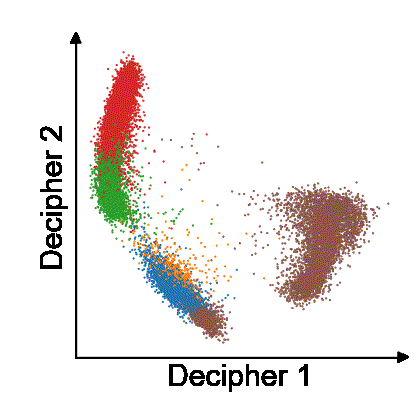

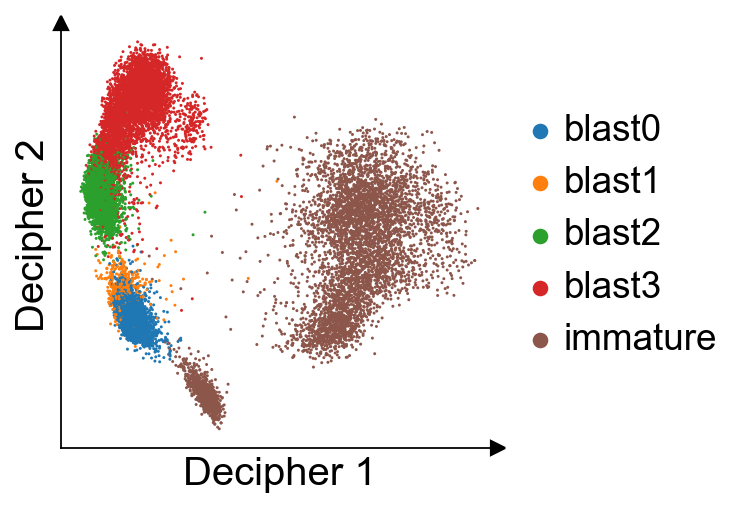

In [7]:
config = dc.tl.DecipherConfig(beta=1e-2)
d1, val1 = dc.tl.decipher_train(
    adata, config, plot_kwargs={"color": "cell_type", "palette": palette_original}, plot_every_k_epochs=5,
)

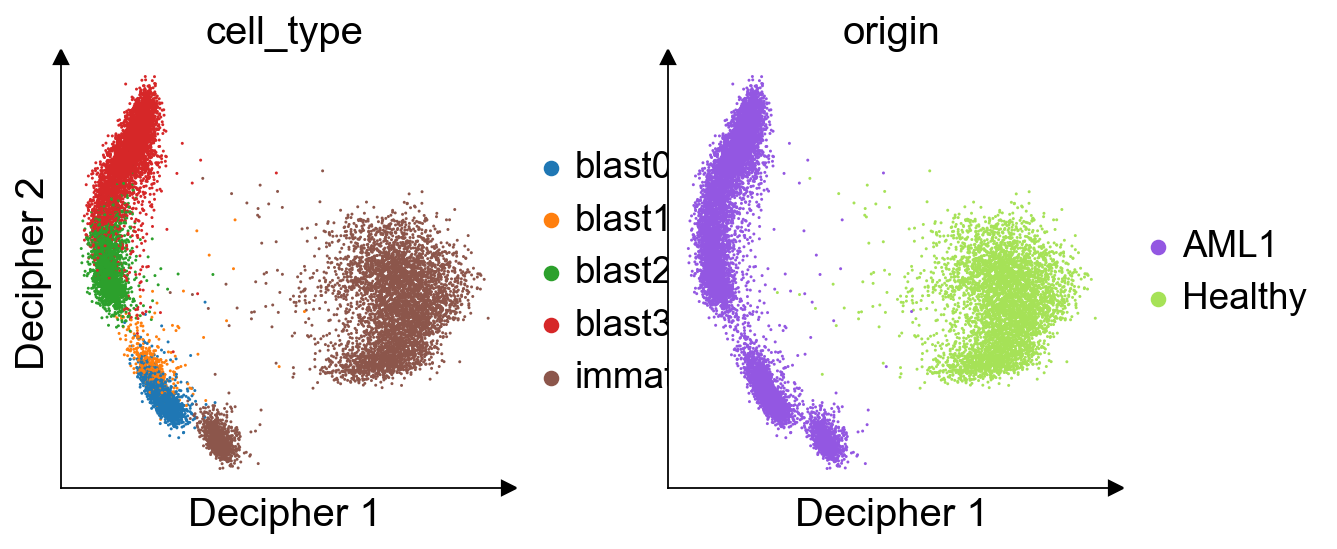

In [8]:
dc.pl.decipher(adata, ["cell_type", "origin"], palette=palette_original);